In [48]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Specify the file path
file_name = 'C:\\Users\\wdd45\\OneDrive\\바탕 화면\\딥러닝응용\\wine.data'

# Define custom column names as a list
custom_column_names = ['Class','Alcohol', 'Malic acid ', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']  # Replace with your desired column names

try:
    # Read the CSV file without header and set custom column names
    data = pd.read_csv(file_name, header=None, names=custom_column_names)
    # Now, 'data' contains your data with custom column names
    print(data)
except FileNotFoundError:
    print(f"File '{file_name}' not found. Please provide the correct file path.")
    
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.head()

     Class  Alcohol  Malic acid    Ash  Alcalinity of ash  Magnesium  \
0        1    14.23         1.71  2.43               15.6        127   
1        1    13.20         1.78  2.14               11.2        100   
2        1    13.16         2.36  2.67               18.6        101   
3        1    14.37         1.95  2.50               16.8        113   
4        1    13.24         2.59  2.87               21.0        118   
..     ...      ...          ...   ...                ...        ...   
173      3    13.71         5.65  2.45               20.5         95   
174      3    13.40         3.91  2.48               23.0        102   
175      3    13.27         4.28  2.26               20.0        120   
176      3    13.17         2.59  2.37               20.0        120   
177      3    14.13         4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28          

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<AxesSubplot:title={'center':'Analyze Correlation of Features'}>

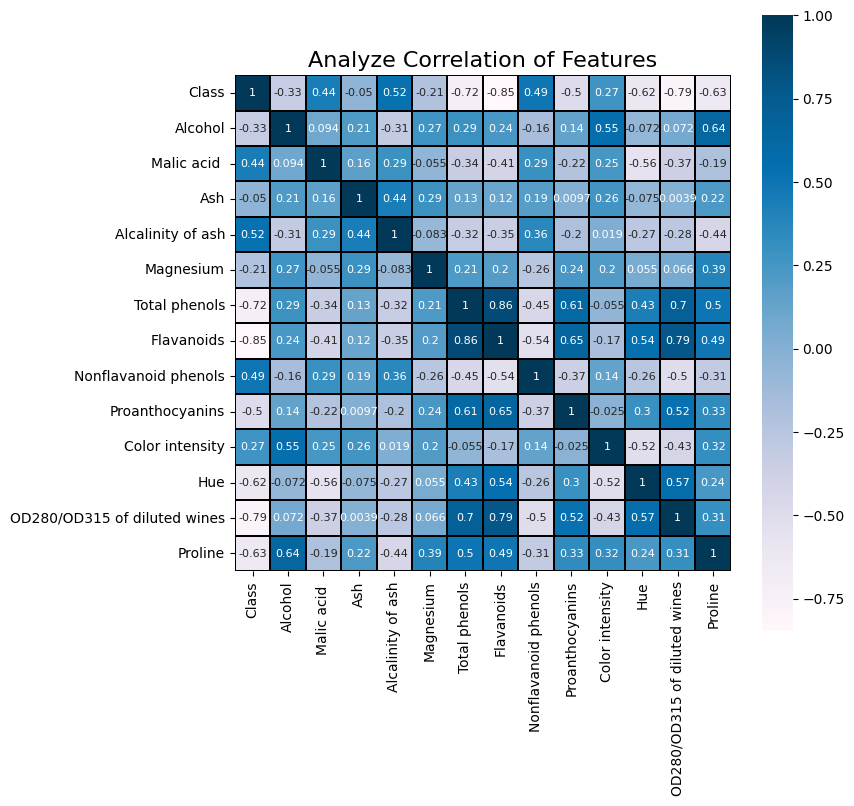

In [46]:

colormap = plt.cm.PuBu
plt.figure(figsize=(8, 8))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 8})

In [60]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Class'] = label.fit_transform(data['Class'])  # Assign the transformed column back to the DataFrame
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [64]:
x = data.drop('Class', axis=1)  # Drop the 'Class' column to get the features
y = data['Class']  # 'Class' column is the target variable

# Check the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (178, 13)
Shape of y: (178,)


In [65]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((133, 13), (45, 13), (133,), (45,))

In [66]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))



--- SVM Classifier ---
0.8222222222222222
[[15  0  1]
 [ 0 17  4]
 [ 0  3  5]]


In [67]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [68]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [69]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9777777777777777
[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]


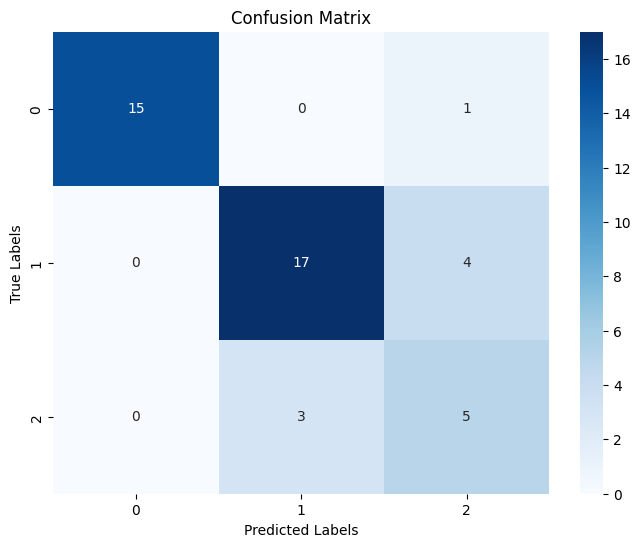

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Replace 'y_test' and 'pred_svm' with your actual test labels and predictions
cm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


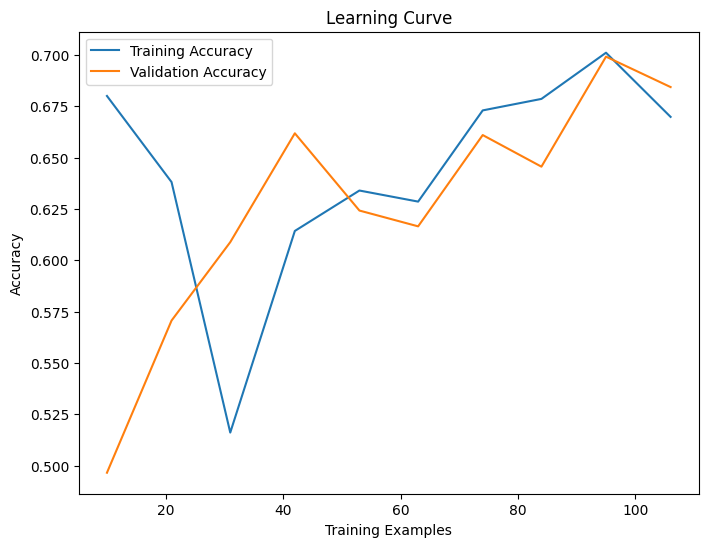

In [72]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    clf_svm, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


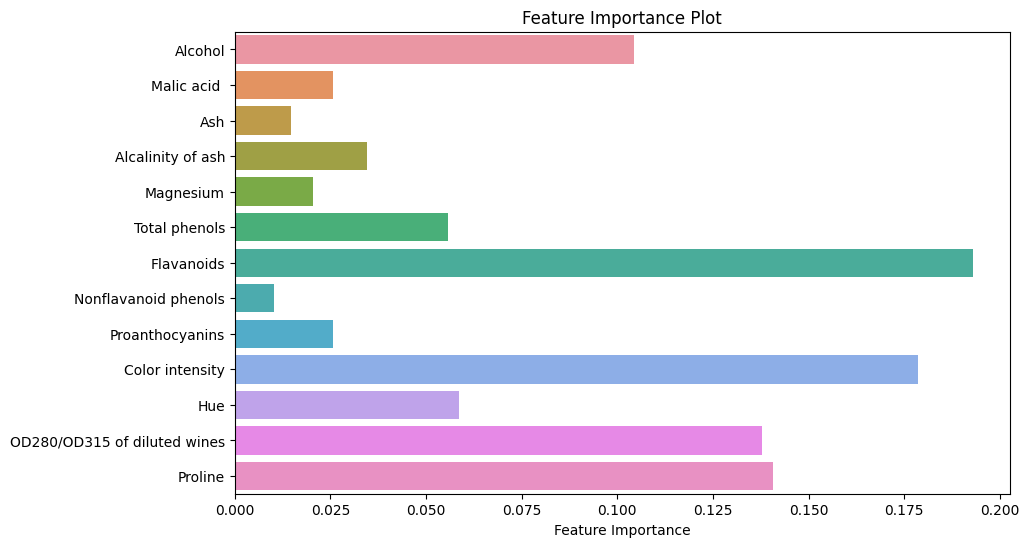

In [73]:
feature_importance = rf_clf.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()
